
## SEIS 764-01: Assignment #2, By - Himanshu Gamit


## Table of Content
    1. Understanding the Data
    2. Data Exploration
    3. Prepare Train-Test Dataset
    4. Create Baseline Model 
    5. Evaluating Model
    6. Answer 1: The Accuracy, Precision, and Recall for each class prediction
    7. Answer 2: ROC curve plot for each class predictions
    9. Summary

## Step 1: Understanding the Data

- Load Data and Fix Target Variable
- Sample Rows: 1217 entries, Data columns (total 14 columns - including target)
- All numerical Columns

In [1]:
#Loading essential libraries and defining settings
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting data set into train-validation-test(test is not used during training of the model)
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility

seed = 2019
np.random.seed(seed)

from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

df = pd.read_csv("./CellDNA.csv", header=None)
'''The last column with non-zero values indicate the bacterium are interesting enough for further study. 
Otherwise (i.e. last column with zero values), those bacterium are not interesting candidates for further study.'''
df[13] = (df[13] > 0).astype(int)
df.head()

Using TensorFlow backend.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,1


- Input datatypes check

In [2]:
#Datatypes in a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 14 columns):
0     1217 non-null int64
1     1217 non-null float64
2     1217 non-null float64
3     1217 non-null float64
4     1217 non-null float64
5     1217 non-null float64
6     1217 non-null float64
7     1217 non-null int64
8     1217 non-null int64
9     1217 non-null float64
10    1217 non-null float64
11    1217 non-null float64
12    1217 non-null float64
13    1217 non-null int32
dtypes: float64(10), int32(1), int64(3)
memory usage: 128.4 KB


## Step 2: Data Exploration
- There is no null values.
- Unbalanced Data, Bacterium which is interesting enough is more important to us (Class 1(200 Samples)), Class 0- 1017 Samples.
- Some columns are skewed - Normalizing should fix a problem.
- Based on pairplot, Most independent variable are useful towards separating target classes.

In [3]:
#Class Percentage Check on value counts
def ret_percentage(column):
    return round(column.value_counts(normalize=True) * 100,2)

print(ret_percentage(df[13]))

df[13].value_counts() #Unbalanced Dataset

0    83.57
1    16.43
Name: 13, dtype: float64


0    1017
1     200
Name: 13, dtype: int64

- **Interpreting Skewness:** If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric.

In [4]:
#Data Skewness check
print(df.skew(axis = 0, skipna = True))

0     2.457449
1    -0.059809
2     0.823809
3     1.526790
4     4.153459
5    -2.473485
6     0.008928
7     2.717102
8    -8.242723
9     1.300952
10   -0.683266
11    0.033663
12    2.935010
13    1.813771
dtype: float64


<Figure size 1152x576 with 0 Axes>

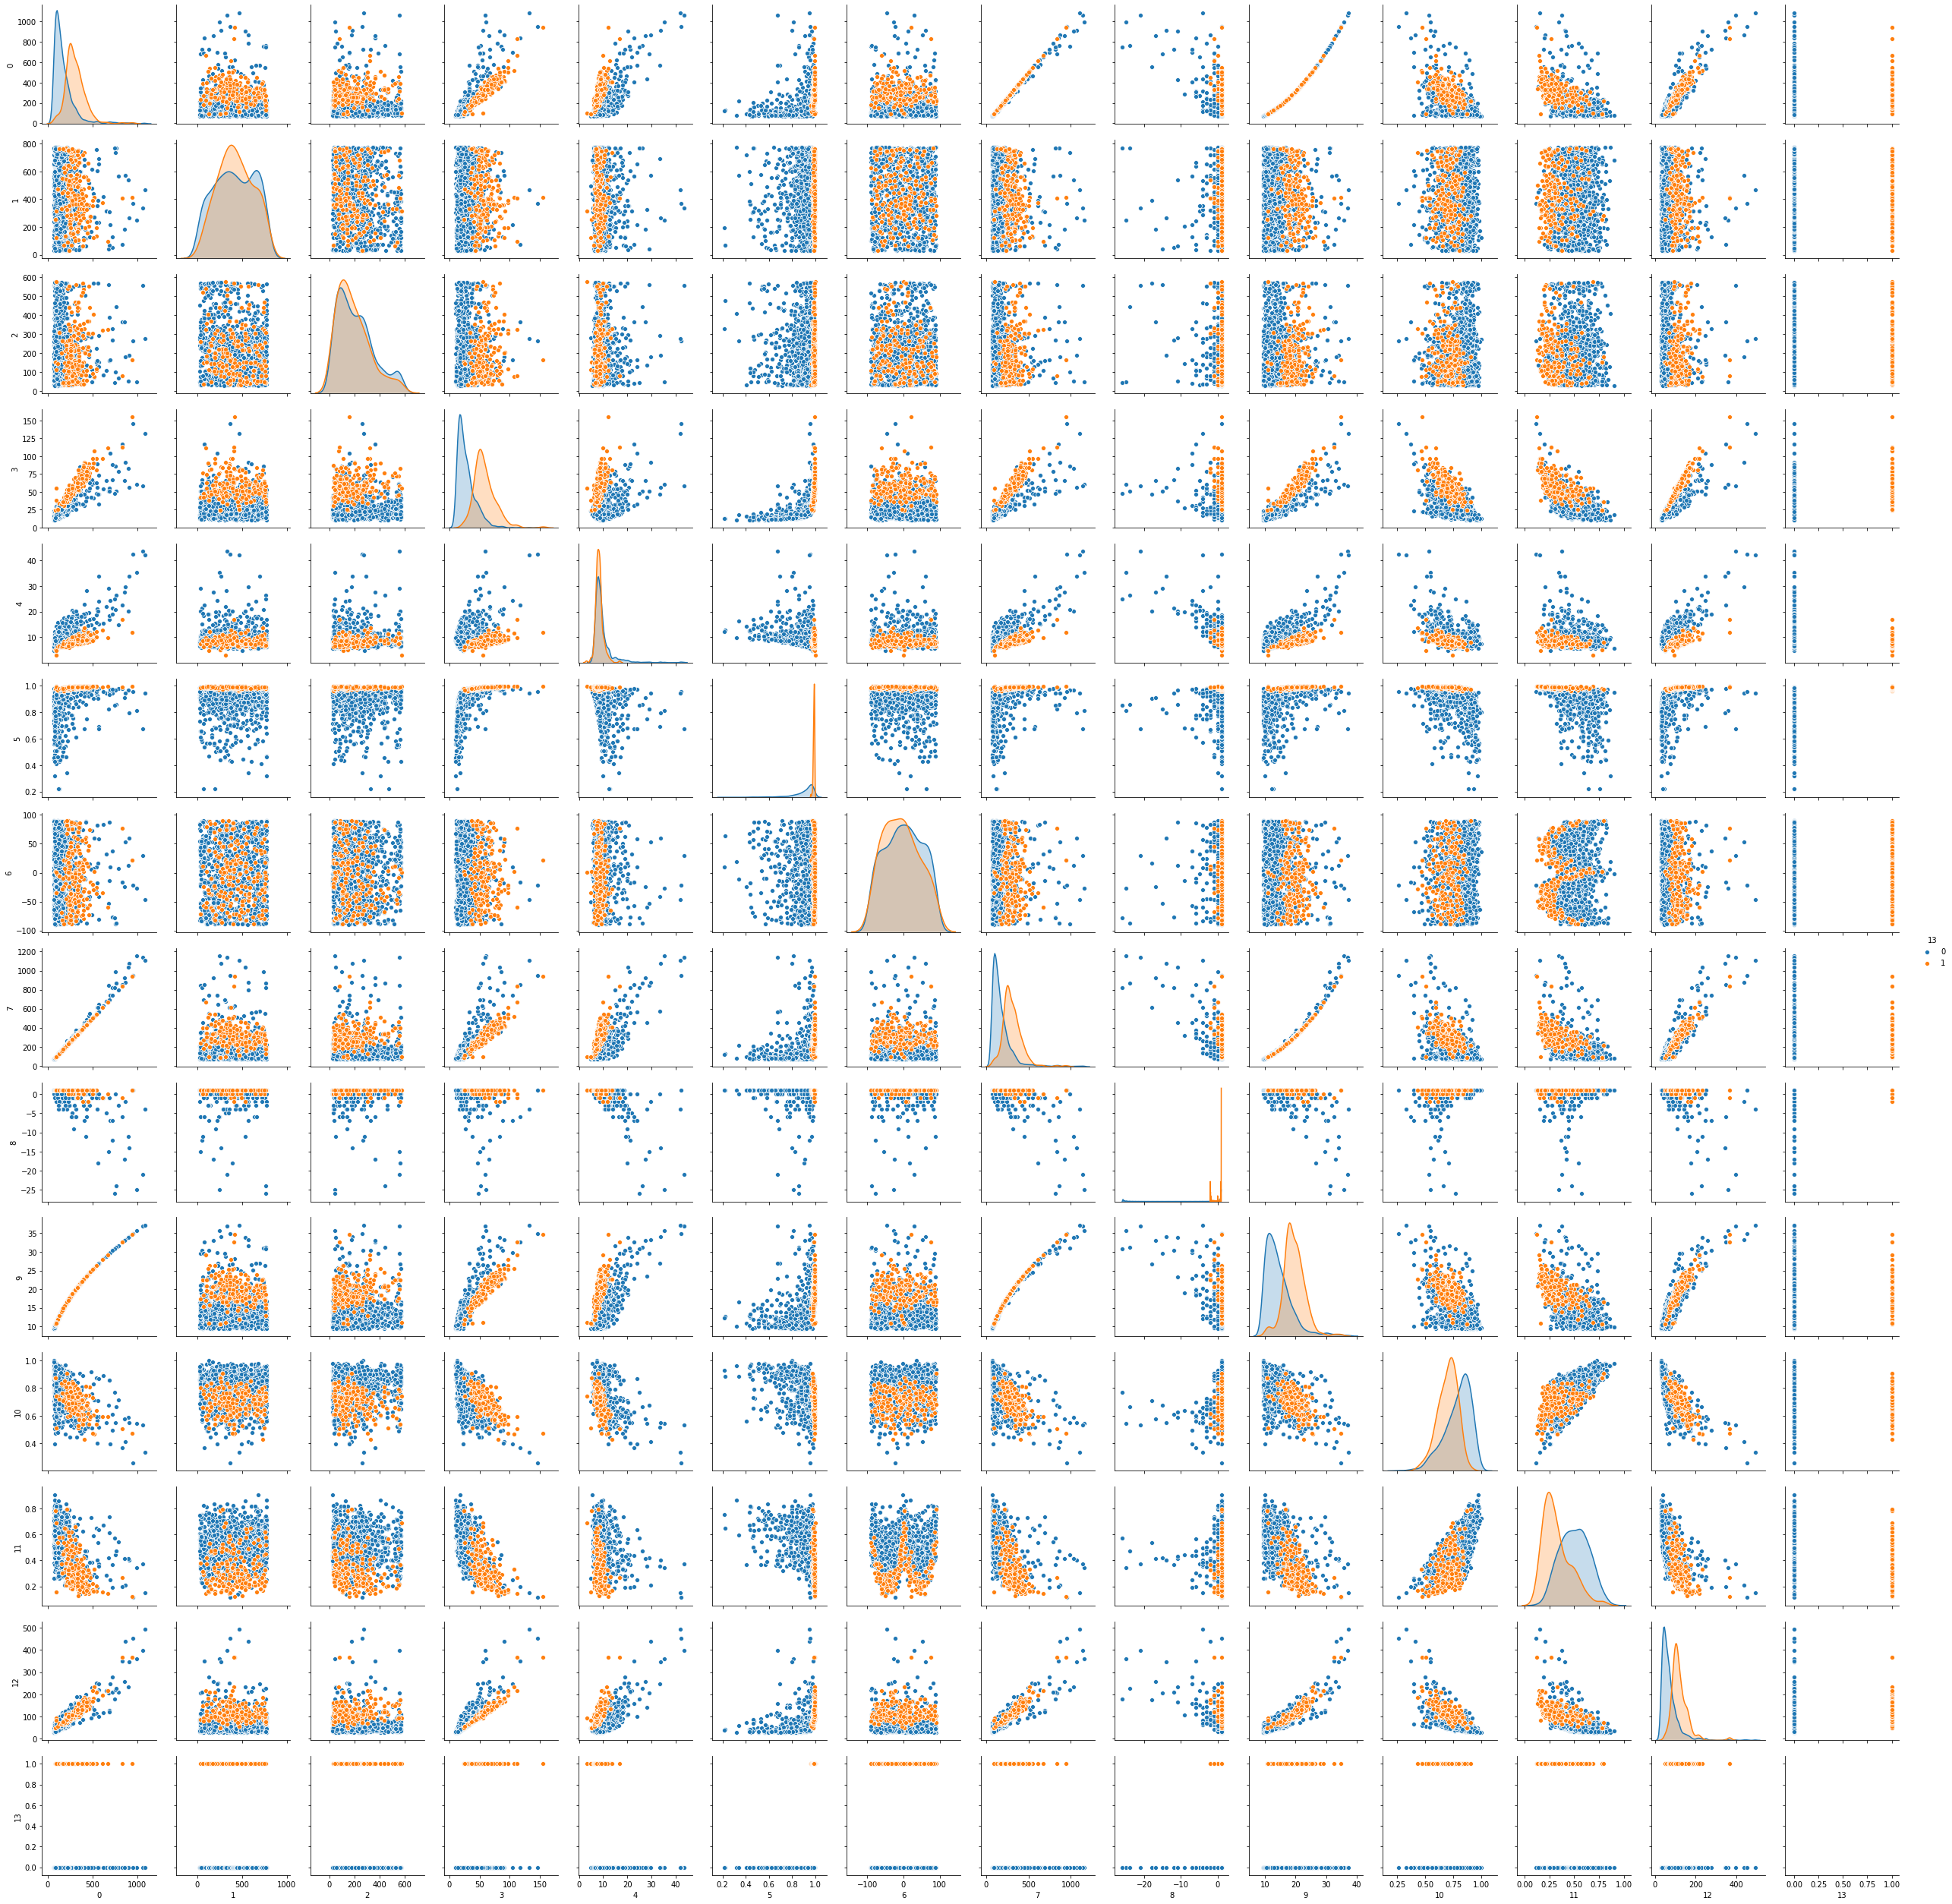

In [5]:
#Features pairplot - able to classify target
plt.figure(figsize = (16,8))
ax = sns.pairplot(df, hue=13)

## Step 3: Prepare Train-Test Dataset
- Create input and target variables
- Normalize Data
- Perform Train-Valid-Test Split for Model Evaluation

**Note:** The model can be trained on whole dataset once we have tuned hyperparameters

In [6]:
# creating input features and target variables
X= df.iloc[:,0:13]
#y= df.iloc[:,13]
y= df.iloc[:,13]

In [7]:
#One hot encoding target variable for softmax
y = pd.DataFrame(y)
y = pd.get_dummies(y[13])
#y.drop(13, axis=1, inplace=True)
y.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [8]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
#Splitting into train-valid-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2019)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,stratify=y_train, random_state=2019)

In [10]:
#Data split distributions
print("Training Samples:",X_train.shape[0])
print("class_0:", y_train[0].sum()," class_1:", y_train[1].sum())
print("Validation Samples:",X_val.shape[0])
print("class_0:", y_val[0].sum()," class_1:", y_val[1].sum())
print("Test Samples:",X_test.shape[0])
print("class_0:", y_test[0].sum()," class_1:", y_test[1].sum())

Training Samples: 875
class_0: 731  class_1: 144
Validation Samples: 98
class_0: 82  class_1: 16
Test Samples: 244
class_0: 204  class_1: 40


## Step 4: Create Baseline Model 
- Define Model
- Fit on training Set

In [11]:
#Load Keras Libs
from keras import backend as K
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

In [12]:
classifier = Sequential() #Empty Network object
#Add First Hidden Layer
classifier.add(Dense(5, activation='relu', input_dim=13))
#Add Second  Hidden Layer
classifier.add(Dense(5, activation='relu'))
#Output Layer
#classifier.add(Dense(1, activation='sigmoid'))
classifier.add(Dense(2, activation='softmax'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss=['categorical_crossentropy'], metrics =['accuracy']) #binary_crossentropy
#, metrics =['accuracy'] ['binary_crossentropy'] categorical_crossentropy

In [13]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=32, epochs=150, validation_data=(X_val, y_val))

Train on 875 samples, validate on 98 samples
Epoch 1/150
875/875 [==============================] - 0s 149us/step - loss: 0.6916 - accuracy: 0.6994 - val_loss: 0.6278 - val_accuracy: 0.8265
Epoch 2/150
875/875 [==============================] - 0s 36us/step - loss: 0.6154 - accuracy: 0.8046 - val_loss: 0.5691 - val_accuracy: 0.8571
Epoch 3/150
875/875 [==============================] - 0s 25us/step - loss: 0.5604 - accuracy: 0.8526 - val_loss: 0.5195 - val_accuracy: 0.8469
Epoch 4/150
875/875 [==============================] - 0s 36us/step - loss: 0.5125 - accuracy: 0.8686 - val_loss: 0.4714 - val_accuracy: 0.8673
Epoch 5/150
875/875 [==============================] - 0s 18us/step - loss: 0.4647 - accuracy: 0.8743 - val_loss: 0.4183 - val_accuracy: 0.8673
Epoch 6/150
875/875 [==============================] - 0s 36us/step - loss: 0.4149 - accuracy: 0.8811 - val_loss: 0.3641 - val_accuracy: 0.8776
Epoch 7/150
875/875 [==============================] - 0s 25us/step - loss: 0.3667 - accur

Epoch 57/150
875/875 [==============================] - 0s 25us/step - loss: 0.1580 - accuracy: 0.9269 - val_loss: 0.1631 - val_accuracy: 0.8878
Epoch 58/150
875/875 [==============================] - 0s 36us/step - loss: 0.1577 - accuracy: 0.9269 - val_loss: 0.1606 - val_accuracy: 0.8980
Epoch 59/150
875/875 [==============================] - 0s 36us/step - loss: 0.1573 - accuracy: 0.9269 - val_loss: 0.1650 - val_accuracy: 0.8878
Epoch 60/150
875/875 [==============================] - 0s 36us/step - loss: 0.1569 - accuracy: 0.9280 - val_loss: 0.1619 - val_accuracy: 0.8980
Epoch 61/150
875/875 [==============================] - 0s 25us/step - loss: 0.1567 - accuracy: 0.9280 - val_loss: 0.1647 - val_accuracy: 0.8878
Epoch 62/150
875/875 [==============================] - 0s 36us/step - loss: 0.1573 - accuracy: 0.9280 - val_loss: 0.1585 - val_accuracy: 0.8980
Epoch 63/150
875/875 [==============================] - 0s 36us/step - loss: 0.1560 - accuracy: 0.9257 - val_loss: 0.1649 - val_ac

875/875 [==============================] - 0s 36us/step - loss: 0.1427 - accuracy: 0.9314 - val_loss: 0.1614 - val_accuracy: 0.8980
Epoch 114/150
875/875 [==============================] - 0s 43us/step - loss: 0.1430 - accuracy: 0.9337 - val_loss: 0.1616 - val_accuracy: 0.8980
Epoch 115/150
875/875 [==============================] - 0s 36us/step - loss: 0.1426 - accuracy: 0.9326 - val_loss: 0.1644 - val_accuracy: 0.8980
Epoch 116/150
875/875 [==============================] - 0s 36us/step - loss: 0.1425 - accuracy: 0.9337 - val_loss: 0.1606 - val_accuracy: 0.8980
Epoch 117/150
875/875 [==============================] - 0s 43us/step - loss: 0.1426 - accuracy: 0.9349 - val_loss: 0.1623 - val_accuracy: 0.8980
Epoch 118/150
875/875 [==============================] - 0s 36us/step - loss: 0.1425 - accuracy: 0.9337 - val_loss: 0.1678 - val_accuracy: 0.8980
Epoch 119/150
875/875 [==============================] - 0s 18us/step - loss: 0.1422 - accuracy: 0.9314 - val_loss: 0.1632 - val_accuracy:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


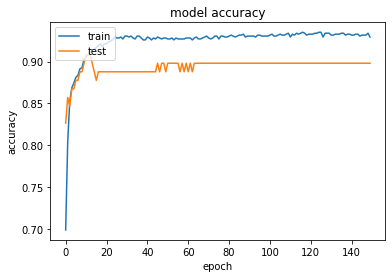

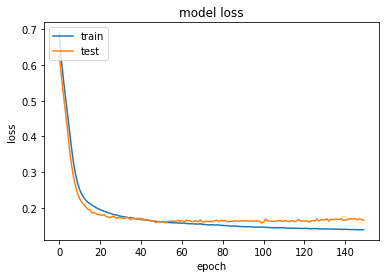

In [14]:
#Plotting Training history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


## Step 5: Evaluating Model

In [16]:
#Evaluating Model
eval_model=classifier.evaluate(X_train, y_train, verbose=0)
print("Training Evaluation")
print("Loss:",eval_model[0])
print("Accuracy:",eval_model[1])

Training Evaluation
Loss: 0.1370829749298947
Accuracy: 0.9325714111328125


In [17]:
eval_model=classifier.evaluate(X_val, y_val, verbose=0)
print("Validation Evaluation")
print("Loss:",eval_model[0])
print("Accuracy:",eval_model[1])

Validation Evaluation
Loss: 0.16537177714766288
Accuracy: 0.8979591727256775


In [18]:
eval_model=classifier.evaluate(X_test, y_test, verbose=0)
print("Test Evaluation")
print("Loss:",eval_model[0])
print("Accuracy:",eval_model[1])

Test Evaluation
Loss: 0.21779988193121114
Accuracy: 0.8975409865379333


#### Making Predictions and further evaluation

In [19]:
#Class Distribution in test data
print("Test Samples:",X_test.shape[0])
print("class_0:", y_test[0].sum()," class_1:", y_test[1].sum())

Test Samples: 244
class_0: 204  class_1: 40


In [20]:
print ("Train Predictions:")

scores = classifier.evaluate(X_train, y_train)
print("Score - \n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
tpredictions = classifier.predict_classes(X_train)
tprediction_ = np.argmax(to_categorical(tpredictions), axis = 1)

print ("Test Predictions:")
scores = classifier.evaluate(X_test, y_test)
print("Score - \n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

predictions = classifier.predict_classes(X_test)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)

Train Predictions:
875/875 [==============================] - 0s 18us/step
Score - 
accuracy: 93.26%
Test Predictions:
244/244 [==============================] - 0s 0us/step
Score - 
accuracy: 89.75%


## Answer 1: The Accuracy, Precision, and Recall for each class prediction

- **Precision:** What proportion of positive identifications was actually correct?
- **Recall:** What proportion of actual positives was identified correctly?
- **Accuracy:** The fraction of predictions our model got right.
- **F1 Score:** The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

In [21]:
##Reversing Dummies
y_train_p = y_train.idxmax(axis=1).map({0: 0, 1: 1})

In [22]:
#Printing Classification Report - Train Data Precision and Recall for each Class
from sklearn.metrics import classification_report
print(classification_report(y_train_p, tpredictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       731
           1       0.80      0.78      0.79       144

    accuracy                           0.93       875
   macro avg       0.88      0.87      0.88       875
weighted avg       0.93      0.93      0.93       875



In [23]:
##Reversing Dummies
y_test_p = y_test.idxmax(axis=1).map({0: 0, 1: 1})

In [24]:
#Printing Classification Report - Test Data Precision and Recall for each Class
from sklearn.metrics import classification_report
print(classification_report(y_test_p, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       204
           1       0.67      0.72      0.70        40

    accuracy                           0.90       244
   macro avg       0.81      0.83      0.82       244
weighted avg       0.90      0.90      0.90       244



## Answer 2: ROC curve plot 

- **AUC:** - AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
- **ROC Curve:** An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Ref# https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/

In [25]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score, auc
y_pred_prob=classifier.predict(X_test)

In [33]:
tpr.shape

(52,)

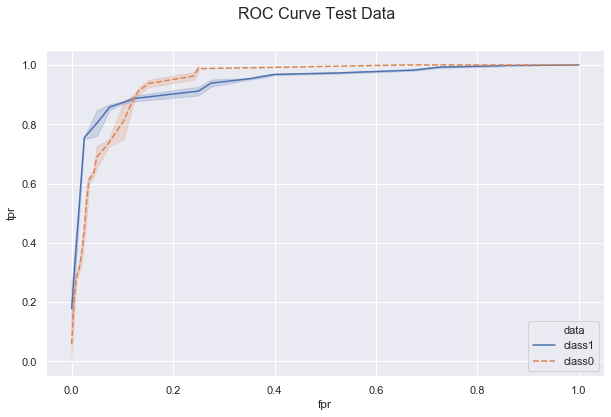

In [27]:
#getting ROC curve values
fpr , tpr , thresholds = roc_curve ( y_test[0], y_pred_prob[:,0])
fprt , tprt , thresholdst = roc_curve ( y_test[1], y_pred_prob[:,1])

df_roct = pd.DataFrame()

df_roct["fpr"] = fprt
df_roct["tpr"] = tprt
df_roct['data'] = 'class0'

df_roc = pd.DataFrame()
df_roc["fpr"] = fpr
df_roc["tpr"] = tpr
df_roc['data'] = 'class1'
df_roc = df_roc.append(df_roct, ignore_index=True)
plt.figure(figsize=(10,6))
s_title ='ROC Curve Test Data'
plt.suptitle(s_title, fontsize=16)
ax = sns.lineplot(x="fpr", y="tpr",
                  hue="data", style="data", data=df_roc)

In [28]:
auc_score=roc_auc_score(y_test[0], y_pred_prob[:,0]) 
print("Test Class-0 AUC:\n", auc_score)

Test Class-0 AUC:
 0.9490196078431372


In [29]:
auc_score=roc_auc_score(y_test[1], y_pred_prob[:,1]) 
print("Test Class-1 AUC:\n", auc_score)

Test Class-1 AUC:
 0.9490196078431373


## Final Models - Test Data Accuracy

Classifier is performing well on classifying Target Classes. It can be improved by hyperparmeter tuning, error analysis and applying advanced regularization techniques. Class 1 Prediction should be improved as well.

| Model | AUC Score | Accuracy(20%) |
| --- | --- | --- |--- |
|Binary Cross Entropy Loss |  0.9490 | 89.75 |